QL
---------
→ → → → → → → G 
→ → ↑ → → → → ↑ 
→ → → → → ↑ ↑ ↑ 
→ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 
↑ → ↑ → → ↑ → ↑ 
↑ ↑ ↑ → → ↑ ↑ ↑ 
↑ ↑ ↑ ↑ → ↑ ↑ ↑ 
↑ ↑ → → → → ↑ ↑ 
[9.99759648e-11 9.99999999e-09 1.00000000e-06 1.00000000e-04
 1.00000000e-02 1.00000000e+00 1.00000000e+02 0.00000000e+00
 9.99999892e-13 1.00000000e-10 1.00000000e-08 1.00000000e-06
 1.00000000e-04 1.00000000e-02 1.00000000e+00 1.00000000e+02
 9.99999522e-15 1.00000000e-12 1.00000000e-10 1.00000000e-08
 1.00000000e-06 1.00000000e-04 1.00000000e-02 1.00000000e+00
 1.00000000e-16 1.00000000e-14 1.00000000e-12 1.00000000e-10
 1.00000000e-08 1.00000000e-06 1.00000000e-04 1.00000000e-02
 1.00000000e-18 1.00000000e-16 1.00000000e-14 9.99999995e-13
 1.00000000e-10 1.00000000e-08 1.00000000e-06 1.00000000e-04
 9.99999620e-21 1.00000000e-18 9.99999999e-17 9.99993192e-15
 1.00000000e-12 1.00000000e-10 1.00000000e-08 1.00000000e-06
 9.99913381e-23 9.99999398e-21 9.99369928e-19 9.95075116e-17
 9.99873812e-15 9.99999992e-13 1.00000000e-10 9.99999976e-

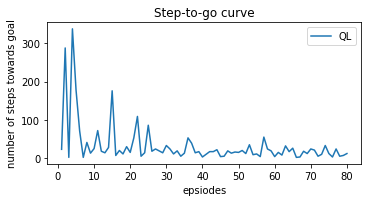

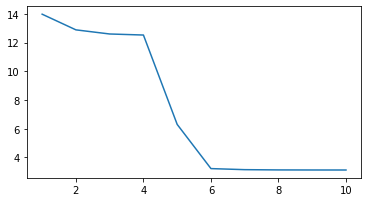

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
class GridWorld():
    def __init__(self,rewards,states,agent):
        self.r = rewards # reward for each grid
        self.statespace = states
        self.agent = agent
    def action_map(self,action,cur):
        # 1 is N
        future = [cur[0],cur[1]]
        if action==0:
            future[0] = future[0]-1
        # 2 is E
        elif action==1:
            future[1] = future[1]+1
        # 3 is S
        elif action==2:
            future[0] = future[0]+1
        # 4 is W
        else:
            future[1] = future[1]-1
        return future

class Agent():
    def __init__(self,cur_pos,states,actions):
        self.pos = cur_pos
        self.action_space = actions
        self.state_space = states
        self.V = np.zeros((states))
        self.Q = np.zeros((states,actions))
    def make_action(self):
        action = random.randint(0,self.action_space)
        return action
    

class Controller():
    def __init__(self,start_pos,row,col,actions,reward,T):
        self.row = row
        self.col = col
        self.T = T
        self.action_space = actions
        self.agent = Agent(start_pos,row*col,actions)
        self.gridworld = GridWorld(reward,row*col,self.agent)
        self.V = np.zeros((self.row*self.col))
        self.Q = np.zeros((self.row*self.col,actions))
#         for state in range(self.row*self.col):
#             for action in range(0,self.action_space):
#                 if not self.has_position(self.gridworld.action_map(action,self.convert_back(state))):
#                     self.Q[state,action] = -1000000
        self.epsilon = 0.001
        self.history = []
    def convert(self,state):
        return state[0]*self.col+state[1]
    def convert_back(self,index):
        return [index//self.col,index-((index)//self.col*self.col)]
    def has_position(self,state):
        if state[0]<0 or state[0]>=self.row or state[1]<0 or state[1]>=self.col:
#             print("state",state)
#             print("self.row",self.row)
#             print("self.col",self.col)
#             print("illegal move!")
            return False
        elif self.T[state[0],state[1]]==1:
#             print("Terminal",self.T[state[0],state[1]])
#             print('hit wall')
            return False
        else:
#             print("Terminal",self.T[state[0],state[1]])
            return True
    def find_max(self,state,Q):
        index = self.convert(state)
        available_action = []
        available_value = []
        for a in range(self.action_space):
            if self.has_position(self.gridworld.action_map(a,self.convert_back(index))):
                available_action.append(a)
                available_value.append(Q[index,a])
        max_value = np.max(np.array(available_value))
        return max_value
    def find_argmax(self,state,Q):
        index = self.convert(state)
        available_action = []
        available_value = []
        for a in range(self.action_space):
            if self.has_position(self.gridworld.action_map(a,self.convert_back(index))):
                available_action.append(a)
                available_value.append(Q[index,a])
        action_index = np.argmax(np.array(available_value))
        action = available_action[action_index]
        return action
    def allmax(self,a):
        if len(a) == 0:
            return []
        all_ = [0]
        max_ = a[0]
        for i in range(1, len(a)):
            if a[i] > max_:
                all_ = [i]
                max_ = a[i]
            elif a[i] == max_:
                all_.append(i)
        return all_
    def action_policy(self,index,t):
        index = self.convert(index)
#         print("enter action_policy function",self.convert_back(index))
        epi = random.randint(0,1)
        if epi<(self.epsilon/t):
#             print("random case")
            available_action = []
            available_value = []
            for a in range(self.action_space):
                if self.has_position(self.gridworld.action_map(a,self.convert_back(index))):
                    available_action.append(a)
            action_index = random.randint(0,len(available_action)-1)
            action = available_action[action_index]
        else:
            available_action = []
            available_value = []
            for a in range(self.action_space):
                if self.has_position(self.gridworld.action_map(a,self.convert_back(index))):
                    available_action.append(a)
                    available_value.append(self.Q[index,a])
            actions = self.allmax((available_value))
            a2 = random.randint(0,len(actions)-1)
            action_index = actions[a2]
            action = available_action[action_index]
        return action
    def action_policy_doubleQ(self,index,t,Q2):
        index = self.convert(index)
        epi = random.randint(0,1)
        if epi<(self.epsilon/t):
            action = random.randint(0,self.action_space-1)
            while not self.has_position(self.gridworld.action_map(action,self.convert_back(index))):
                action = random.randint(0,self.action_space-1)
        else:
            actions = self.allmax(self.Q[index]+Q2[index])
            a2 = random.randint(0,len(actions)-1)
            action = actions[a2]
#             action = np.argmax(self.Q[index])
        return action
    def render_action(self,action):
        display = ''
        if action==0:
            display='\u2191'
        elif action==1:
            display='\u2192'
        elif action==2:
            display='\u2193'
        else:
            display='\u2190'
        return display
    def render(self):
#         for i in range(self.row):
#             for j in range(self.col):
#                 print(np.max(self.Q[i*self.col+j]),end=' ')
#             print()
        print("---------")
        for i in range(self.row):
            for j in range(self.col):
                if self.T[i,j]==2:
                    print("G",end=' ')
                elif self.T[i,j]==1:
                    print("X",end=' ')
                else:
                    available_action = []
                    available_value = []
                    for a in range(self.action_space):
                        if self.has_position(self.gridworld.action_map(a,self.convert_back(i*self.col+j))):
                            available_action.append(a)
                            available_value.append(self.Q[i*self.col+j,a])
                    actions = self.allmax(available_value)
                    a2 = random.randint(0,len(actions)-1)
                    action_index = actions[a2]
                    action = available_action[action_index]
                    print(self.render_action(action),end=' ')
            print()
    def render_DP(self):
        for i in range(self.row):
            for j in range(self.col):
                if self.T[i,j]==2:
                    print("G",end=' ')
                elif self.T[i,j]==1:
                    print("X",end=' ')
                else:
                    Update_value = []
                    for a in range(self.action_space):
                        future = self.gridworld.action_map(a,[i,j])
                        if not self.has_position(future):
                            future = [i,j]
                            reward = -100000
                        else:
                            reward = self.gridworld.r[future[0],future[1]]
                        Update_value.append(reward+0.01*self.V[self.convert(future)])
                    max_action = np.argmax(np.array(Update_value))
                    print(self.render_action(max_action),end=' ')
            print()
        print(self.V)
            
    def render_DQ(self,Q):
#         print("V table for DQ")
#         for i in range(self.row):
#             for j in range(self.col):
#                 print(np.max((self.Q[i*self.col+j]+Q[i*self.col+j])/2),end=' ')
#             print()
#         print("---------")
        for i in range(self.row):
            for j in range(self.col):
                if self.T[i,j]==2:
                    print("G",end=' ')
                elif self.T[i,j]==1:
                    print("X",end=' ')
                else:
                    print(self.render_action(np.argmax(self.Q[i*self.col+j]+Q[i*self.col+j])),end=' ')
            print()
    def reset(self):
        self.V = np.zeros((self.row*self.col))
        self.Q = np.zeros((self.row*self.col,self.action_space))
        for state in range(self.row*self.col):
            for action in range(0,self.action_space):
                if not self.has_position(self.gridworld.action_map(action,self.convert_back(state))):
                    self.Q[state,action] = -1000000
        self.epsilon = 0.001
    def eval_mode(self,V):
        self.V = V
        print("---------")
        for i in range(self.row):
            for j in range(self.col):
                if self.T[i,j]==2:
                    print("G",end=' ')
                elif self.T[i,j]==1:
                    print("X",end=' ')
                else:
                    available_action = []
                    available_value = []
                    for a in range(self.action_space):
                        if self.has_position(self.gridworld.action_map(a,self.convert_back(i*self.col+j))):
                            available_action.append(a)
                            future = self.gridworld.action_map(a,[i,j])
                            reward = self.gridworld.r[future[0],future[1]]
                            available_value.append(reward+0.01*self.V[self.convert(future)])
                    max_action = np.argmax(np.array(available_value))
                    max_action = available_action[max_action]
                    print(self.render_action(max_action),end=' ')
            print()
    def generate_epsiode(self):
        epsiode = []
#         start = [0,0]
        Reward = []
        step = 0
        states = []
        row_s = random.randint(0,self.row-1)
        col_s = random.randint(0,self.col-1)
        start = [row_s,col_s]
        while(self.T[row_s,col_s]!=0):
            row_s = random.randint(0,self.row-1)
            col_s = random.randint(0,self.col-1)
            start = [row_s,col_s]
        while self.T[start[0],start[1]] !=2:
            action = self.action_policy(start,1)
            future = self.gridworld.action_map(action,start)
            reward = self.gridworld.r[future[0],future[1]]
            epsiode.append((self.convert(start),action,reward))
            states.append((self.convert(start),action))
            start = future
            step = step+1
        return epsiode,states,step
    def start(self,mode):
        alpha = 0.5
        gamma = 0.01
#         row_s = random.randint(0,self.row-1)
#         col_s = random.randint(0,self.col-1)
        start = [0,0]
        Reward = []
        V_step = []
        Q2 = self.Q
        if mode == 'QL': # off policy TD
            iteration=0
            step = 0
            while iteration<=10000:
                while self.T[start[0],start[1]] ==2:
                    #print("epsiode over, start again")
                    row_s = random.randint(0,self.row-1)
                    col_s = random.randint(0,self.col-1)
                    start = [row_s,col_s]
                    Reward.append(step)
                    step = 0
                    V_step.append(np.max(self.Q,axis=1))
#                 print("select action")
#                 print("state",start)
                action = self.action_policy(start,1)
#                 print("action:",self.render_action(action))
                future = self.gridworld.action_map(action,start)
                reward = self.gridworld.r[future[0],future[1]]
                self.Q[self.convert(start),action] = (1-alpha)*self.Q[self.convert(start),action]+alpha*(reward+gamma*self.find_max(future,self.Q))
                start = future
                iteration+=1
                step+=1
            self.render()
        elif mode == 'Sarsa': #on policy TD
            iteration=0
#             row_s = random.randint(0,self.row-1)
#             col_s = random.randint(0,self.col-1)
            start = [0,0]
            step = 0
#             while self.T[start[0],start[1]] !=0:
#                 row_s = random.randint(0,self.row-1)
#                 col_s = random.randint(0,self.col-1)
            action = self.action_policy(start,1)
            while iteration<=5000:
                while self.T[start[0],start[1]] ==2:
                    #epsiode over, start again
#                     row_s = random.randint(0,self.row-1)
#                     col_s = random.randint(0,self.col-1)
                    start = [0,0]
                    action = self.action_policy(start,1)
                    Reward.append(step)
                    V_step.append(np.max(self.Q,axis=1))
                    step = 0
                future = self.gridworld.action_map(action,start)
                reward = self.gridworld.r[future[0],future[1]]
                action_future = self.action_policy(future,1)
#                 print("current state:",start)
#                 print("current action:",self.render_action(action))
#                 print("future state:",future)
#                 print("future action selected",self.render_action(action_future))
                self.Q[self.convert(start),action] = (1-alpha)*self.Q[self.convert(start),action]+alpha*(reward+gamma*self.Q[self.convert(future),action_future])
                start = future
                action = action_future
                step +=1
                iteration+=1
            self.render()
            print("end")
        elif mode == 'DQL': # double Q
            iteration=0
            step = 0
            while iteration<=5000:
                if iteration>=4900:
                    self.epsilon = 0
                while self.T[start[0],start[1]] ==2:
                    #print("epsiode over, start again")
#                     row_s = random.randint(0,self.row-1)
#                     col_s = random.randint(0,self.col-1)
                    start = [0,0]
                    Reward.append(step)
                    V_step.append(np.max((self.Q+Q2),axis=1))
                    step = 0
                action = self.action_policy(start,1)
                future = self.gridworld.action_map(action,start)
                reward = self.gridworld.r[future[0],future[1]]
                dq = random.randint(0,1)
                if dq<=0.5:
                    self.Q[self.convert(start),action] = (1-alpha)*self.Q[self.convert(start),action]+alpha*(reward+gamma*Q2[self.convert(future),self.find_argmax(future,self.Q)])
                else:
                    Q2[self.convert(start),action] = (1-alpha)*Q2[self.convert(start),action]+alpha*(reward+gamma*self.Q[self.convert(future),self.find_argmax(future,Q2)])
                start = future
                iteration+=1
                step+=1
            self.render_DQ(Q2)
        elif mode == 'MC': # first visit MC value estimation
            iteration = 0
            Returns = [[[]for j in range(self.action_space)] for i in range(self.row*self.col)]
            while iteration<=4000:
                epsiode,state_action_pairs,steps = self.generate_epsiode()
                G = 0
                for i in range(len(epsiode)-1,-1,-1):
                    G = gamma*G+epsiode[i][2]
                    temp_states = state_action_pairs[i-1::-1]
                    if state_action_pairs[i] in temp_states:
                        pass
                    else:
                        Returns[state_action_pairs[i][0]][state_action_pairs[i][1]].append(G)
                        self.Q[state_action_pairs[i][0],state_action_pairs[i][1]] = sum(Returns[state_action_pairs[i][0]][state_action_pairs[i][1]])/len(Returns[state_action_pairs[i][0]][state_action_pairs[i][1]])
                Reward.append(steps)
                V_step.append(np.max(self.Q,axis=1))
                iteration+=1
            self.render()
        elif mode == 'DP':
            gamma = 0.1
            iteration=0
            while True:
                delta = 0
                for i in range(self.row):
                    for j in range(self.col):
                        if self.T[i,j]==0:
                            v = self.V[self.convert([i,j])]
                            Update_value = []
                            for a in range(self.action_space):
                                future = self.gridworld.action_map(a,[i,j])
                                if not self.has_position(future):
                                    future = [i,j]
                                    reward = -100
                                else:
                                    reward = self.gridworld.r[future[0],future[1]]
                                Update_value.append(reward+gamma*self.V[self.convert(future)])
                            max_update = max(Update_value)
                            self.V[self.convert([i,j])] = max_update
                            delta = max([delta,abs(v-self.V[self.convert([i,j])])])
                        else:
                            pass
                V_step.append(self.V)
                Reward.append(iteration)
                iteration +=1
                if delta<0.00000001:
                    break
            self.render_DP()
        else:
            pass
        return Reward,V_step
        

#     R = np.array([[0,-80,100],[0,0,0],[25,-100,80]])
#     Terminal = np.array([[0,2,2],[0,0,0],[2,2,2]])
# R = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,100],[0,0,0,0,0],[0,0,0,0,0]])
# Terminal = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,2],[0,0,0,0,0],[0,0,0,0,0]])
# R = np.array([[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]])
# Terminal = np.array([[0,0,1,0,1,1,1,2],[0,0,1,0,0,0,0,0],[0,0,0,0,1,1,1,0],[0,0,0,0,0,0,0,0],[0,0,1,0,1,0,1,0],[1,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,1,0]])
R = np.array([[0,0,0,0,0,0,0,100],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]])
Terminal = np.array([[0,0,0,0,0,0,0,2],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]])
start = [0,0]
actions = 4
controller = Controller(start,R.shape[0],R.shape[1],actions,R,Terminal)
print("QL")
Reward_QL,V_QL = controller.start("QL")
V_optimal = np.max(controller.Q,axis=1)
print(V_optimal)
# #     print("theoretical value table K",np.max(controller.Q,axis=1))
#     controller.reset()
#     print("MC")
#     Reward_MC,V_MC = controller.start("MC")
#     controller.reset()
#     print("Sarsa")
#     Reward_SARSA,V_SARSA = controller.start("Sarsa")
#     controller.reset()
#     print("DQL")
#     Reward_DQL,V_DQL= controller.start("DQL")
# #     V_optimal = np.max(controller.Q,axis=1)
#     print("DP")
#     controller.reset()
#     Reward_DP,V_DP = controller.start("DP")
RMSE_QL = []
RMSE_DQL = []
RMSE_SARSA = []
RMSE_DP = []
RMSE_MC = []
for x in V_QL:
    RMSE_QL.append(np.sqrt(np.mean((x-V_optimal)**2)))
#     for x in V_DQL:
#         RMSE_DQL.append(np.sqrt(np.mean((x-V_optimal)**2)))
#     for x in V_SARSA:
#         RMSE_SARSA.append(np.sqrt(np.mean((x-V_optimal)**2)))
#     for x in V_DP:
#         RMSE_DP.append(np.sqrt(np.mean((x-V_optimal)**2)))
#     for x in V_MC:
#         RMSE_MC.append(np.sqrt(np.mean((x-V_optimal)**2)))
#     x1 = []
#     for i in range(len(Reward_DQL)):
#         x1.append(i+1)
x2 = []
for i in range(len(Reward_QL)):
    x2.append(i+1)
#     x3 = []
#     for i in range(len(Reward_SARSA)):
#         x3.append(i+1)
#     x4 = []
#     for i in range(len(Reward_DP)):
#         x4.append(i+1)
#     x5 = []
#     for i in range(len(Reward_MC)):
#         x5.append(i+1)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#     ax.plot(x1[0:80:1],Reward_DQL[0:80:1], label='DQL')
ax.plot(x2[0:80:1],Reward_QL[0:80:1],label='QL')
#     ax.plot(x3[0:80:1],Reward_SARSA[0:80:1],label='SARSA')
#     ax.plot(x5[0:80:1],Reward_MC[0:80:1],label='MC')
ax.set_xlabel('epsiodes')  # Add an x-label to the axes.
ax.set_ylabel('number of steps towards goal')  # Add a y-label to the axes.
ax.set_title("Step-to-go curve")  # Add a title to the axes.
ax.legend()  # Add a legend.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#     ax.plot(x1[0:10:1],RMSE_DQL[0:10:1],label='DQL')
ax.plot(x2[0:10:1],RMSE_QL[0:10:1],label='QL')
#     ax.plot(x3[0:10:1],RMSE_SARSA[0:10:1],label='SARSA')
#     ax.plot(x4,RMSE_DP,label='DP')
#     ax.plot(x5[0:80:1],RMSE_MC[0:80:1], label='MC')

#     ax.set_xlabel('epsiodes')  # Add an x-label to the axes.
#     ax.set_ylabel('RMS error')  # Add a y-label to the axes.
#     ax.set_title("Plot for MC")  # Add a title to the axes.
#     ax.legend()  # Add a legend.

#     fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#     ax.plot(x2[0:80:1],RMSE_QL[0:80:1],label='QL')

#     ax.set_xlabel('epsiodes')  # Add an x-label to the axes.
#     ax.set_ylabel('RMS error')  # Add a y-label to the axes.
#     ax.set_title("Plot for QL")  # Add a title to the axes.
#     ax.legend()  # Add a legend.
#     fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#     ax.plot(x3[0:80:1],RMSE_SARSA[0:80:1],label='SARSA')

#     ax.set_xlabel('epsiodes')  # Add an x-label to the axes.
#     ax.set_ylabel('RMS error')  # Add a y-label to the axes.
#     ax.set_title("Plot for SARSA")  # Add a title to the axes.
#     ax.legend()  # Add a legend.



In [2]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import copy

class ANN(nn.Module):
    def __init__(self, in_dim, hid_dim, out_dim,num_layers):
        super(ANN, self).__init__()
        self.activations = nn.ModuleList()
        self.activations.append(nn.ReLU(hid_dim))
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(in_dim,hid_dim))
#         self.dropouts = nn.ModuleList()
#         self.dropouts.append(nn.Dropout(p=0.5))
        self.num_layers = num_layers
        for _ in range(self.num_layers):
            self.layers.append(nn.Linear(hid_dim,hid_dim))
            self.activations.append(nn.ReLU(hid_dim))
#             self.dropouts.append(nn.Dropout(p=0.5))
        self.layers.append(nn.Linear(hid_dim,out_dim))
    
    def forward(self,x):
        for fnn, act in zip(self.layers,self.activations):
            x = fnn(x)
            x = act(x)
#             z = drop(z)
        out = self.layers[-1](x)
        return out

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, OneHotEncoder
import random
def count_parameters(model):
    return sum([np.prod(p.size()) for p in model.parameters() if p.requires_grad])
X = []
X_coor = []
for i in range(Terminal.shape[0]):
    for j in range(Terminal.shape[1]):
        if Terminal[i,j]!=1:
            X.append(i*Terminal.shape[1]+j)
            X_coor.append([i,j])
X = np.array(X)
X_coor = np.array(X_coor)
y = np.array([V_optimal[x] for x in X])
sort_y = np.argsort(y)
count = 0
for indice in sort_y:
    y[indice] = count
    count+=1
print(y)
X = X.reshape(-1,1)
in_dim = X.shape[0]*X.shape[1]
hid_dim = 8
out_dim = 1
num_layers = 3
lr = 0.001
wd = 0.1
model = ANN(in_dim, hid_dim, out_dim, num_layers)
model = model.double()
print(f'# params: {count_parameters(model)}')
# target_model  = copy.deepcopy(model)
optimizer = th.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()





# create a mapping from original index to compressed version
onehot_encoder = OneHotEncoder(categories='auto').fit(X)
X = onehot_encoder.transform(X).toarray().astype(int)
# print(X.shape)
print("X",X)
# print(y)
x_train = th.from_numpy(X).double()
y_train = th.from_numpy(y).double()
# x_train = th.from_numpy(X_coor).double()
# x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# print(x_train.shape)
# x_train = th.from_numpy(x_train).double()
# x_val = th.from_numpy(x_val).double()
# y_train = th.from_numpy(y_train).double()
# y_train = y_train.reshape((y_train.shape[0],1))
# y_val = th.from_numpy(y_val).double()
# y_val = y_val.reshape((y_val.shape[0],1))
# x_train = Variable(x_train)
# y_trian = Variable(y_train)

epochs = 300
early_stop = 0
lowest_loss = 100
epoch = 0
for e in range(epochs):
    index_list = th.randperm(x_train.shape[0])
    model.train()
    loss_sum = 0
    if e %50 ==0 and e!=0:
        lr = lr/10
        optimizer = th.optim.Adam(model.parameters(), lr=lr)
    for i in index_list:
        x = x_train[i]
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output,y_train[i])
        loss.backward()
        optimizer.step()
        loss_sum+=loss.item()
#     model.eval()
#     output = model(x_val)
#     loss_cur =criterion(output,y_val)
#     if e!=0 and loss_cur>=loss_pre:
#         early_stop+=1
#         print("epoch",e)
#         print("early stop")
#         if early_stop>=10:
#             break
#     loss_pre = loss_cur
#     print("validation loss",loss_cur)
    if lowest_loss>=loss_sum/in_dim:
        lowest_loss = loss_sum/in_dim
        epoch = e
    print("training loss",loss_sum/in_dim)
    print("epoch",e)
print("lowest_loss",lowest_loss)
print("epoch at",epoch)
# model.eval()
# output = model(x_test)
# loss = criterion(output,y_test)
# print("test loss",loss)
V_predict = model(th.from_numpy(X).double())
V_predict = V_predict.detach().cpu().numpy()
print(V_predict)
y = np.array([V_optimal[x] for x in X])
V_final = []
count = 0
for i in range(Terminal.shape[0]):
    for j in range(Terminal.shape[1]):
        if Terminal[i,j]!=1:
            V_final.append(V_predict[count])
            count+=1
        else:
            V_final.append(-10000)
V_final = np.array(V_final)
print(V_final)
controller.eval_mode(V_final)
np.set_printoptions(precision=0)
print(V_final.flatten())

[30. 38. 45. 54. 56. 60. 63.  0. 22. 34. 41. 46. 51. 55. 59. 62. 18. 27.
 35. 42. 48. 52. 57. 61. 14. 21. 28. 33. 39. 47. 50. 58.  9. 15. 20. 24.
 31. 40. 49. 53.  6. 10. 13. 17. 25. 36. 43. 44.  3.  5.  7. 11. 16. 23.
 32. 37.  1.  2.  4.  8. 12. 19. 26. 29.]
# params: 745
X [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\Users\17518\anaconda3\envs\AGCL_ENV\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


training loss 1332.5920958105396
epoch 0
training loss 1321.37967272379
epoch 1
training loss 1279.4888198603635
epoch 2
training loss 1137.3380787448748
epoch 3
training loss 800.0320522131606
epoch 4
training loss 448.3424885896306
epoch 5
training loss 324.5982610251646
epoch 6
training loss 304.5933959912814
epoch 7
training loss 290.0753529976612
epoch 8
training loss 277.95041211374433
epoch 9
training loss 262.98986380296196
epoch 10
training loss 252.50013547516198
epoch 11
training loss 239.98732948066478
epoch 12
training loss 227.7944194228582
epoch 13
training loss 216.51062638056
epoch 14
training loss 206.34696854590308
epoch 15
training loss 194.60681386271787
epoch 16
training loss 183.38989805590677
epoch 17
training loss 172.44809842318435
epoch 18
training loss 161.08937554011604
epoch 19
training loss 151.1626022057357
epoch 20
training loss 138.74454815869817
epoch 21
training loss 128.340294130243
epoch 22
training loss 115.99295295638784
epoch 23
training loss 10

training loss 0.037726889583348806
epoch 191
training loss 0.03769299549867437
epoch 192
training loss 0.03767229184715161
epoch 193
training loss 0.03764361834776537
epoch 194
training loss 0.03761897838000953
epoch 195
training loss 0.037587171967380026
epoch 196
training loss 0.03756368200365014
epoch 197
training loss 0.03753655938535373
epoch 198
training loss 0.037511009527948946
epoch 199
training loss 0.03749254194077199
epoch 200
training loss 0.037491356080015636
epoch 201
training loss 0.037487406579243134
epoch 202
training loss 0.03748511563758938
epoch 203
training loss 0.03748197618347033
epoch 204
training loss 0.037479458423251955
epoch 205
training loss 0.03747686478586801
epoch 206
training loss 0.03747383385920507
epoch 207
training loss 0.037471137781408564
epoch 208
training loss 0.03746832150697133
epoch 209
training loss 0.037466196861121875
epoch 210
training loss 0.037463041925272125
epoch 211
training loss 0.037460441551773194
epoch 212
training loss 0.037457